In [1]:
from mfglib.env import Environment
from mfglib.alg.utils import _ensure_free_tensor,tuple_prod
from mfglib.mean_field import mean_field
from typing import Literal, cast
import torch
from mfglib.alg.greedy_policy_given_mean_field import Greedy_Policy
import matplotlib.pyplot as plt
from mfglib.alg import MFOMO,PriorDescent, FictitiousPlay,OnlineMirrorDescent, TwoScaleLearning
from mfglib.metrics import exploitability_score
from mfglib.alg.q_fn import QFn
import scipy
import scienceplots
#plt.style.use(['science','no-latex'])
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


c:\Users\minghuiw\AppData\Local\anaconda3\envs\mfg\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
env_instance = Environment.susceptible_infected(T = 10)

In [64]:
solns, solns_mu, expls, diffs, runtimes = TwoScaleLearning(Q_speed = 0.55, mu_speed=1).solve(env_instance, max_iter=50000, verbose=True)

            MFGLib v0.1.1 : A Library for Mean-Field Games             
                  (c) RADAR Research Lab, UC Berkeley                  

Environment summary:
	S=(30,)
	A(3,)
	T=15
	r_max=30

Algorithm summary:
	OnlineMirrorDescent(Q_speed=0.55, mu_speed=1)
	atol=0.001
	rtol=0.001
	max_iter=50000

-----------------------------------------------------------------------
| iter |  expl_n  | expl_n / expl_0 | argmin_{0..n} expl_i | time (s) |
-----------------------------------------------------------------------
|  0   | 4.32947  |     1.00000     |          0           |  0.000   |
|  1   | 3.62756  |     0.83788     |          1           |  0.009   |
|  2   | 1.88417  |     0.43520     |          2           |  0.020   |
|  3   | 1.44820  |     0.33450     |          3           |  0.024   |
|  4   | 0.82420  |     0.19037     |          4           |  0.038   |
|  5   | 0.44480  |     0.10274     |          5           |  0.048   |
|  6   | 0.36831  |     0.08507     |         

In [83]:
torch.save(solns, "results/beach_pi_record.pt")
torch.save(solns_mu, "results/beach_nu_record.pt")
torch.save(expls, "results/beach_exp_record.pt")
torch.save(diffs, "results/beach_diff_record.pt")
torch.save(runtimes, "results/beach_time_record.pt")


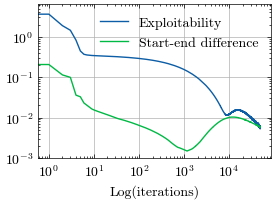

In [97]:
expls = torch.load("results/beach_exp_record.pt")
diffs = torch.load("results/beach_diff_record.pt")

plt.figure(figsize=(3, 2))
plt.plot(expls, label='Exploitability') 
plt.plot(diffs, label='Start-end difference') 
plt.legend()
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Log(iterations)')
plt.savefig('results/beach_converge',dpi=300)

plt.show()

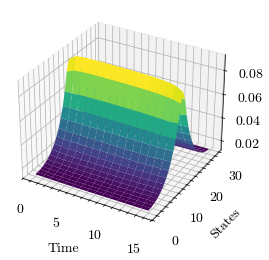

In [96]:
solns = torch.load("results/beach_pi_record.pt")
solns_mu = torch.load("results/beach_nu_record.pt")

pi = solns[-1]
nu = solns_mu[-1]

env_instance.update_initial_distribution(nu)
L = mean_field(env_instance, pi)
mu = torch.sum(L, axis=2)
mu_np = mu.numpy()

# Create meshgrid for X (days) and Y (states)
days = np.arange(mu.shape[0])  # [0, 1, 2]
states = np.arange(mu.shape[1])  # [0, 1, 2, 3]
X, Y = np.meshgrid(days, states, indexing='ij')  # Use 'ij' to align correctly

# Plotting
fig = plt.figure(figsize=(5, 3))
ax = fig.add_subplot(111, projection='3d')

# Surface plot
surf = ax.plot_surface(X, Y, mu_np, cmap='viridis')

# Labels
ax.set_xlabel("Time")
ax.set_ylabel("States")
ax.set_zlabel("Value")

plt.savefig('results/beach_CMFE',dpi=300)

plt.show()

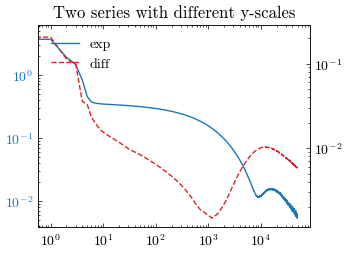

In [66]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

fig, ax1 = plt.subplots()
ax1.plot(expls, color = colors[0], label='exp')
# ax1.set_xlabel('x')
# ax1.set_ylabel('y1 (x²)', color='g')
ax1.tick_params(axis='y', labelcolor=colors[0])


# create a second y‐axis
ax2 = ax1.twinx()
ax2.plot(diffs, color = colors[3], linestyle = '--', label='diff')
#ax2.set_ylabel('diff')
ax2.tick_params(axis='y')

# optional: combine legends
lines, labels = ax1.get_lines() + ax2.get_lines(), [l.get_label() for l in ax1.get_lines()+ax2.get_lines()]
ax1.legend(lines, labels, loc='upper left')

ax1.set_xscale('log')
ax1.set_yscale('log')
ax2.set_yscale('log')
plt.title("Two series with different y-scales")
plt.show()

            MFGLib v0.1.1 : A Library for Mean-Field Games             
                  (c) RADAR Research Lab, UC Berkeley                  

Environment summary:
	S=(2,)
	A(2,)
	T=10
	r_max=1.5

Algorithm summary:
	FictitiousPlay(alpha=None)
	atol=0.001
	rtol=0.001
	max_iter=5000

-----------------------------------------------------------------------
| iter |  expl_n  | expl_n / expl_0 | argmin_{0..n} expl_i | time (s) |
-----------------------------------------------------------------------
|  0   | 1.60624  |     1.00000     |          0           |  0.000   |
|  1   | 0.99270  |     0.61803     |          1           |  0.024   |
|  2   | 0.70546  |     0.43920     |          2           |  0.043   |
|  3   | 0.51747  |     0.32216     |          3           |  0.065   |
|  4   | 0.40957  |     0.25498     |          4           |  0.077   |
|  5   | 0.33922  |     0.21119     |          5           |  0.086   |
|  6   | 0.28963  |     0.18032     |          6           |  0.10

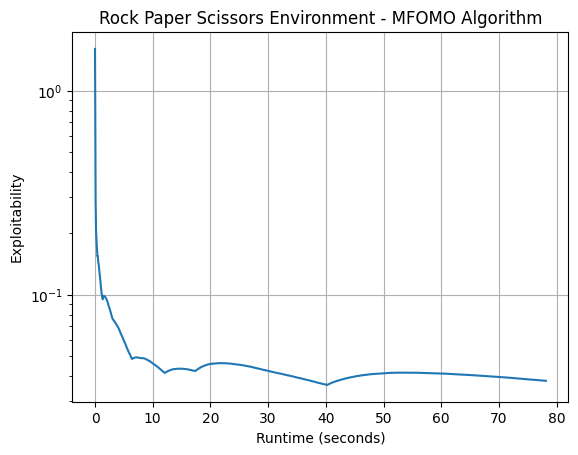

In [5]:
solns, expls, runtimes = FictitiousPlay().solve(env_instance, max_iter=5000, verbose=True)
plt.semilogy(runtimes, exploitability_score(env_instance, solns)) 

plt.grid(True)
plt.xlabel("Runtime (seconds)")
plt.ylabel("Exploitability")
plt.title("Rock Paper Scissors Environment - MFOMO Algorithm")
plt.show()

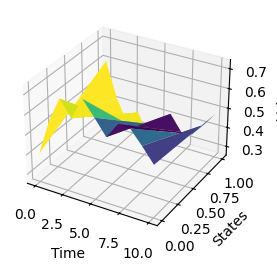

In [7]:
pi = solns[-1]

L = mean_field(env_instance, pi)
mu = torch.sum(L, axis=2)
mu_np = mu.numpy()

# Create meshgrid for X (days) and Y (states)
days = np.arange(mu.shape[0])  # [0, 1, 2]
states = np.arange(mu.shape[1])  # [0, 1, 2, 3]
X, Y = np.meshgrid(days, states, indexing='ij')  # Use 'ij' to align correctly

# Plotting
fig = plt.figure(figsize=(5, 3))
ax = fig.add_subplot(111, projection='3d')

# Surface plot
surf = ax.plot_surface(X, Y, mu_np, cmap='viridis')

# Labels
ax.set_xlabel("Time")
ax.set_ylabel("States")
ax.set_zlabel("Value")

#plt.savefig('results/beach_MFE',dpi=300)

plt.show()